In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from bs4 import BeautifulSoup as bs
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
!pip3 install textblob
!pip3 install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\SONY
[nltk_data]     VAIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SONY
[nltk_data]     VAIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df=pd.read_csv('Downloads\Elon_musk.csv')

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
def cleantext(tweet):
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet) # Remove Mentions
    tweet = re.sub(r"#", "", tweet) # Remove Hashtags Symbol
    tweet = re.sub(r"RT[\s]+", "", tweet) # Remove Retweets
    tweet = re.sub(r"https?:\/\/\S+", "", tweet) # Remove The Hyper Link
    
    return tweet

In [5]:
df.Text = df.Text.apply(cleantext)

In [6]:
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(df.to_string())
print(tokenized_text)

['      Unnamed: 0                                                                                                                                                                                              Text\n0              1                                                                                                                                                                                      I�m an alien\n1              2                                                                                                                   _AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.', 'Have you tried it?', '2              3                                                                                                                                                                                  Great interview!', '3              4                                                                                                                               

In [7]:
from nltk.tokenize import word_tokenize 
tokenized_sentence=word_tokenize(df["Text"].to_string())
print(tokenized_sentence)

['0', 'I�m', 'an', 'alien', '1', '_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', '...', '2', 'Great', 'interview', '!', '3', 'Doge', 'is', 'underestimated', '4', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execu', '...', '5', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', '6', 'Frodo', 'was', 'the', 'underdoge', ',', '\\nAll', 'thought', 'he', 'would', '...', '7', '_', 'Haha', 'thanks', ':', ')', '8', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'r', '...', '9', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '10', 'Just', 'sent', 'some', '11', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', '12', '13', 'It�s', 'getting', 'real', '14', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be', 'a', '...', '15', 'He', 'definitely', 'has', 'issues', ',', 'but', 'the', 'sentencing', '...', '16', 'Thanks', 'for', 'fixing', '17', 'Please', 'unlock', 'my', 'account', '18', '<', 'U+0001F923', '>

In [8]:
df.head()

,Unnamed: 0,Text
0,1,I�m an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [9]:
stopwords=open ('Downloads\stop.txt',"r").read()
print(stopwords)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

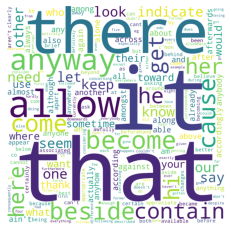

In [10]:
wordcloud0 = WordCloud(stopwords = stopwords,
                            background_color = 'white',
                            width = 2000,
                            height = 2000,
                            ).generate(stopwords)
plt.imshow(wordcloud0)
plt.axis('off')
plt.show()

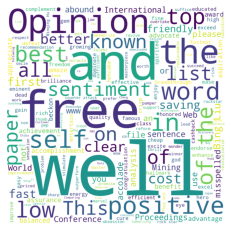

In [11]:
poswords=open ('Downloads\positive-words.txt',"r").read()
wordcloud = WordCloud(stopwords = stopwords,
                            background_color = 'white',
                            width = 2000,
                            height = 2000,
                            ).generate(poswords)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

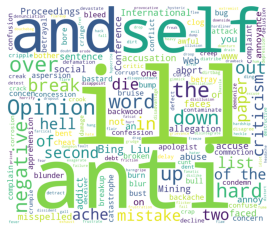

In [12]:
negwords=open ('Downloads\\negative-words.txt',"r").read()
wordcloud1 = WordCloud(stopwords = stopwords,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            ).generate(negwords)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [13]:
from textblob import TextBlob

In [14]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(Text):
    return TextBlob(Text).sentiment.subjectivity

In [15]:
# function for Polarity
def calc_pola(Text):
    return TextBlob(Text).sentiment.polarity

In [16]:
df['Subjectivity'] = df.Text.apply(calc_subj)
df['Polarity'] = df.Text.apply(calc_pola)

In [17]:
df.head(10)

,Unnamed: 0,Text,Subjectivity,Polarity
0,1,I�m an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
5,6,Happy New Year of the Ox!,0.727273,0.485227
6,7,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000
7,8,_ Haha thanks :),0.500000,0.300000
8,9,Indeed! Tweets definitely do not represent r...,0.500000,0.000000
9,10,The most entertaining outcome is the most likely,0.675000,0.375000


In [18]:
# Compute The Negative, Neutral, Positive Analysis
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result

In [19]:
# Create a New Analysis Column
df['Sentiment'] = df.Polarity.apply(sentiment)

In [20]:
# Print The Data
df

,Unnamed: 0,Text,Subjectivity,Polarity,Sentiment
0,1,I�m an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Netural
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Netural
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Netural
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


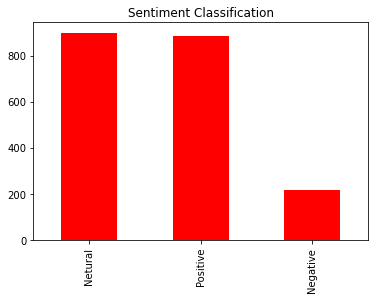

In [21]:
# ratio of sentiment
df.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

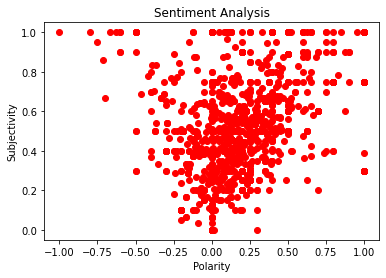

In [22]:
plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [23]:
# let's see the percentage of different sentiment's class
# Create
df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)

In [24]:
# calculating percentage
df_sentiment['Total'] = df.Sentiment.value_counts()

In [25]:
df_sentiment

,Sentiment,Total
Netural,44.972486,899
Positive,44.272136,885
Negative,10.755378,215
